# What is the Positional Encoding?

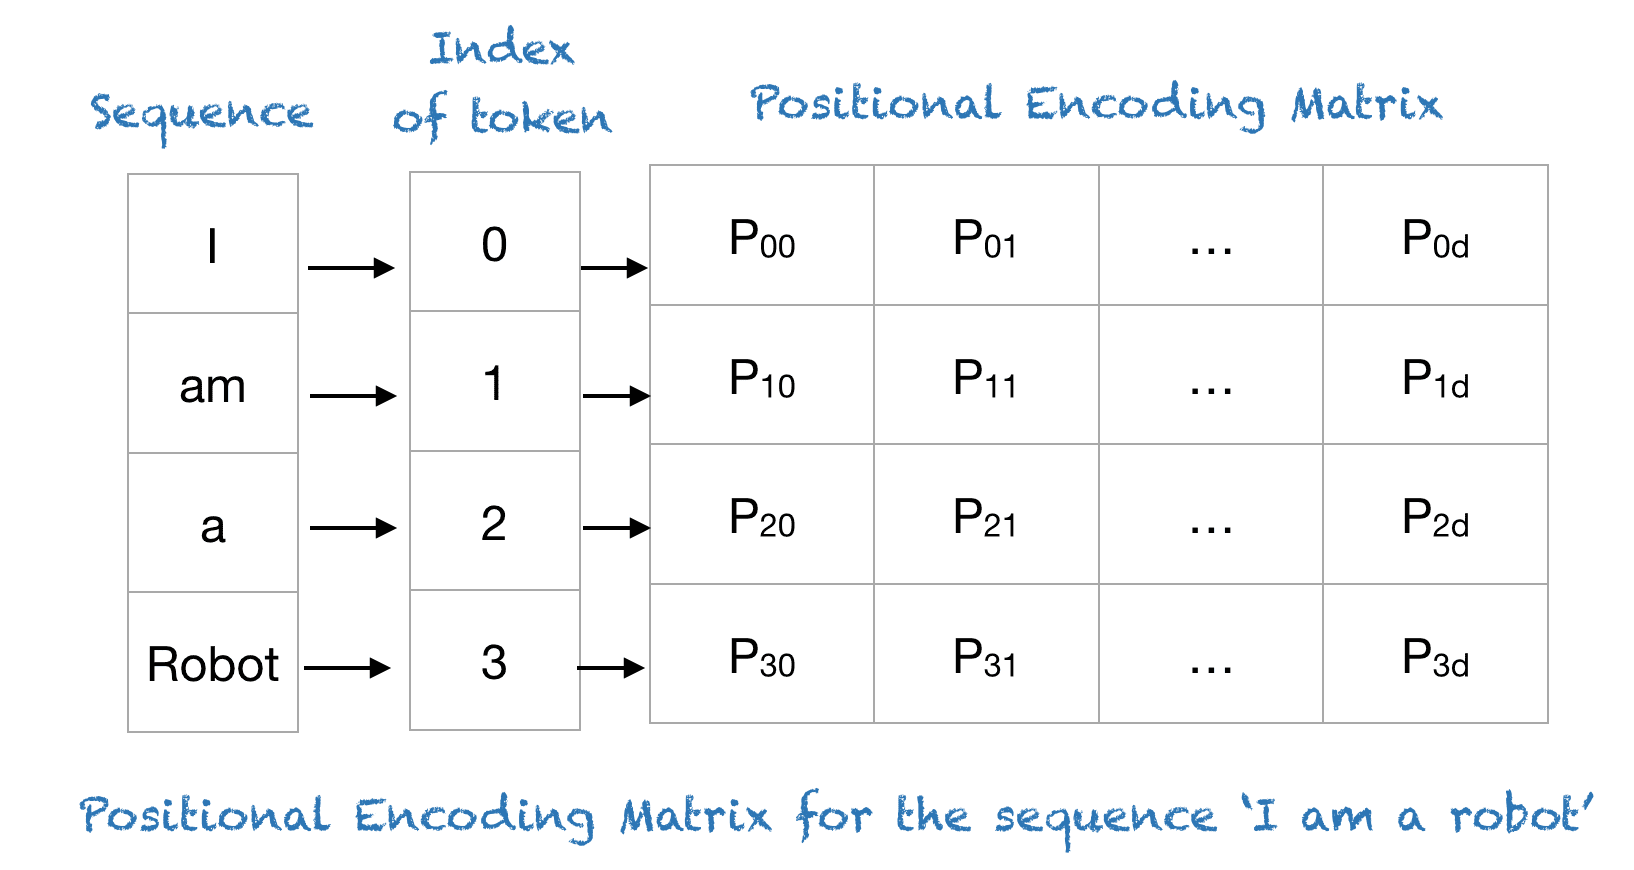

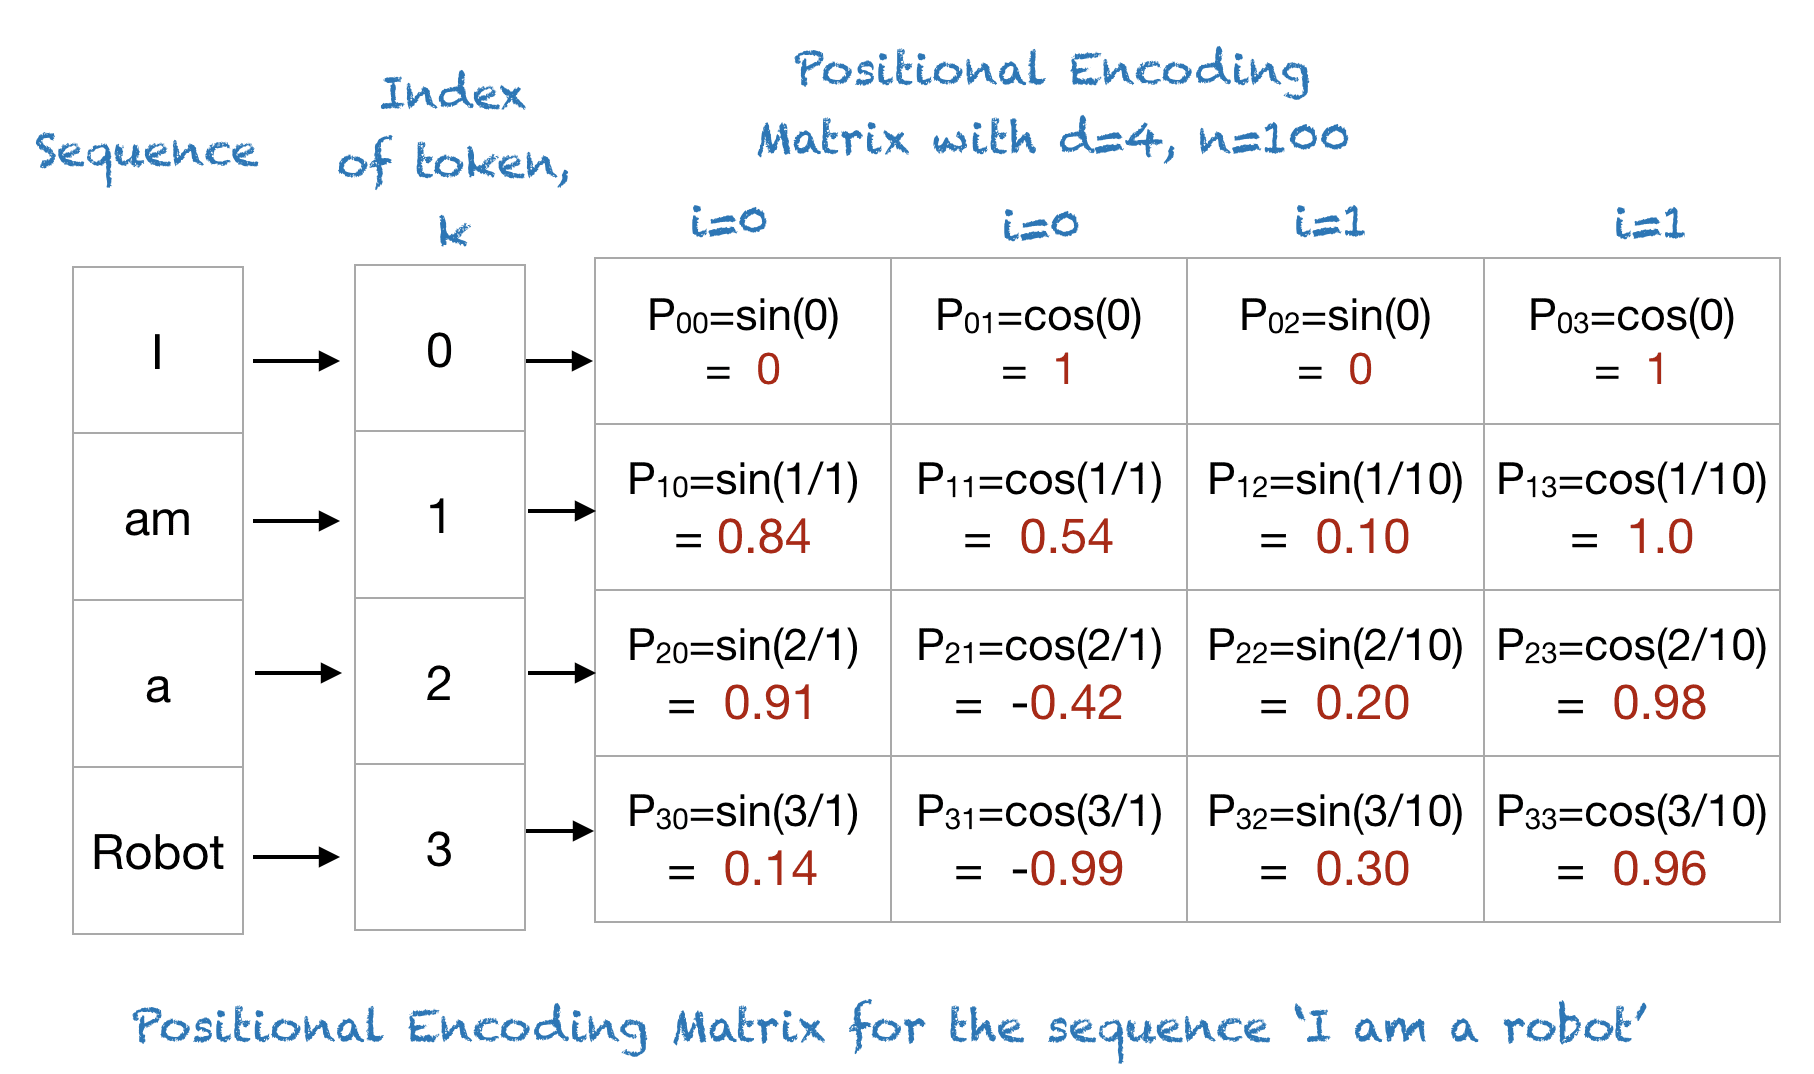

# Positional Encoding Layer in Transformers

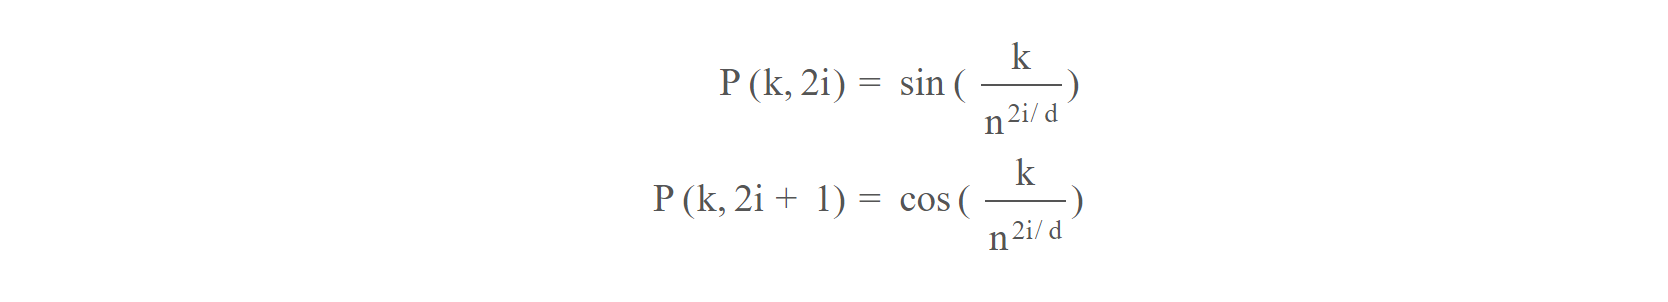

* k: Position of an object in the input sequence, 0 < k < L/2
* d: Dimension of the output embedding space

* P (k, j ): Position function for mapping a position k in the input sequence to index (k, j ) of the
positional matrix

* n: User-defined scalar, set to 10,000 by the authors of Attention Is All You Need.

* i: Used for mapping to column indices 0 < i < d/ 2, with a single value of i maps to both sine and
cosine functions


## Advantages of using this scheme
* The sine and cosine functions have values in [-1, 1], which keeps the values of the positional encoding matrix in a normalized range.
* As the sinusoid for each position is different, you have a unique way of encoding each position.
* You have a way of measuring or quantifying the similarity between different positions, hence enabling you to encode the relative positions of words.

In [1]:
import matplotlib.pyplot as plt
import numpy as np

In [2]:
 def getPositionEncoding(seq_len, d, n=10000):
    P = np.zeros((seq_len, d))
    for k in range(seq_len):
        for i in np.arange(int(d/2)):
            denominator = np.power(n, 2*i/d)
            P[k, 2*i] = np.sin(k/denominator)
            P[k, 2*i+1] = np.cos(k/denominator)
    return P
 
P = getPositionEncoding(seq_len=4, d=4, n=100)
print(P)

[[ 0.          1.          0.          1.        ]
 [ 0.84147098  0.54030231  0.09983342  0.99500417]
 [ 0.90929743 -0.41614684  0.19866933  0.98006658]
 [ 0.14112001 -0.9899925   0.29552021  0.95533649]]


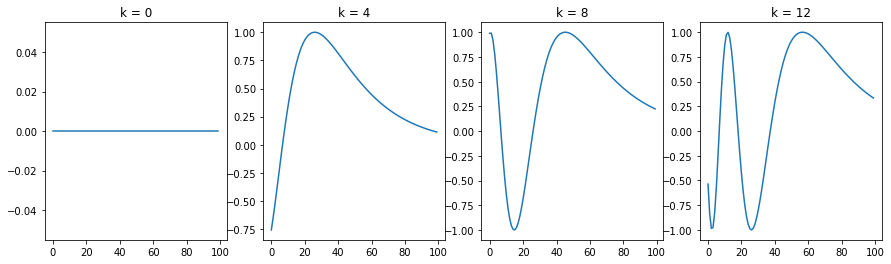

In [3]:
def plotSinusoid(k, d=512, n=10000):
    x = np.arange(0, 100, 1)
    denominator = np.power(n, 2*x/d)
    y = np.sin(k/denominator)
    plt.plot(x, y)
    plt.title('k = ' + str(k))
 
fig = plt.figure(figsize=(15, 4))    
for i in range(4):
    plt.subplot(141 + i)
    plotSinusoid(i*4)

# What Is the Final Output of the Positional Encoding Layer?
* The positional encoding layer sums the positional vector with the word encoding and outputs this matrix for the subsequent layers.

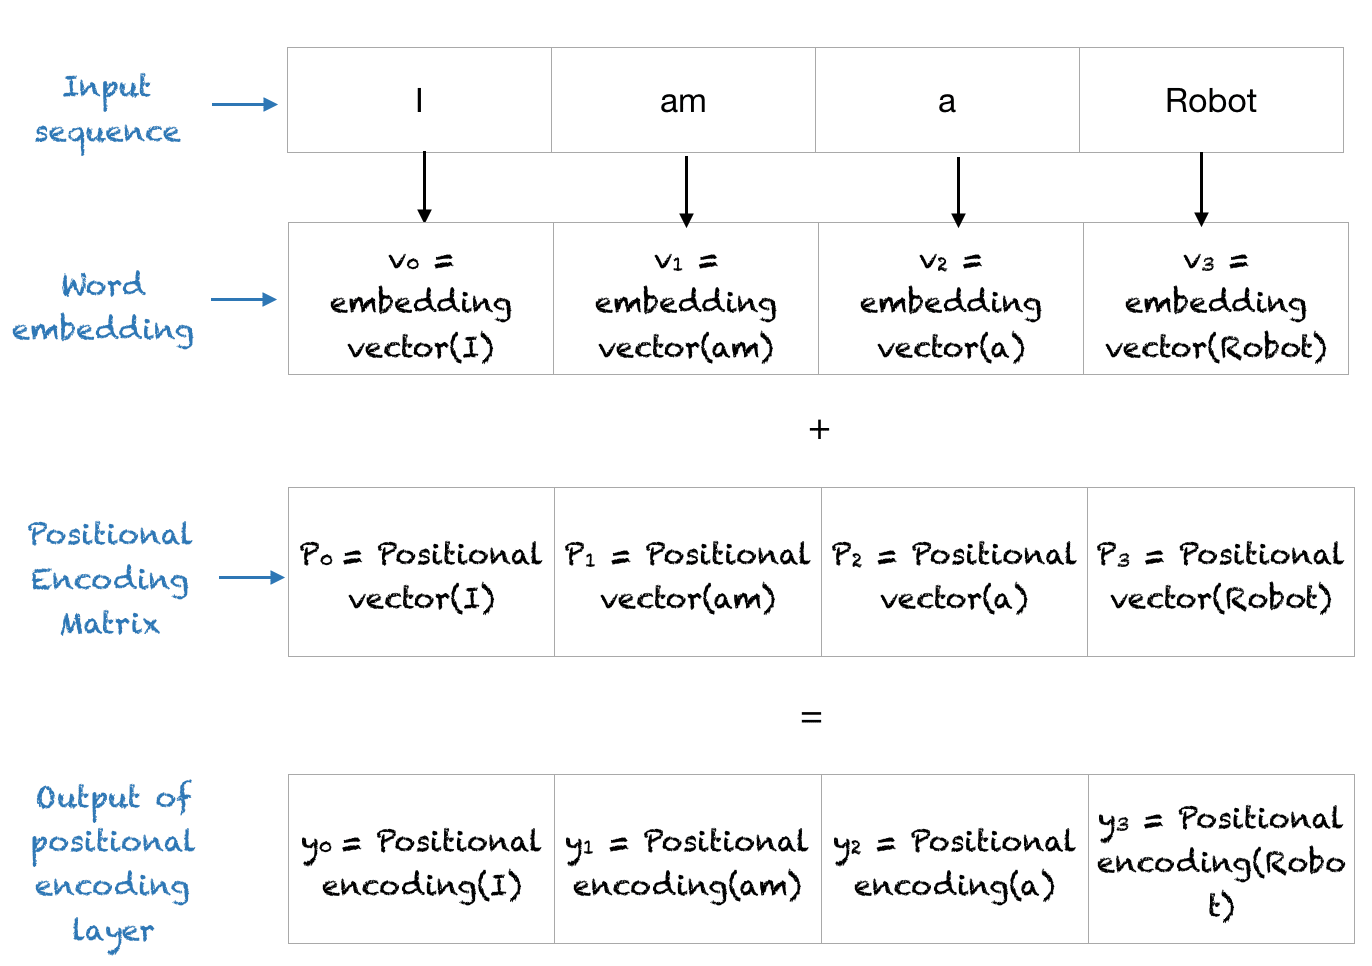

# The Text Vectorization Layer

In [4]:
import tensorflow as tf
from tensorflow import convert_to_tensor, string
from tensorflow.keras.layers import TextVectorization, Embedding, Layer
from tensorflow.data import Dataset
import numpy as np
import matplotlib.pyplot as plt

In [5]:
output_sequence_length = 5
vocab_size = 10
sentences = [["I am a robot"], ["you too robot"]]
sentence_data = Dataset.from_tensor_slices(sentences)
# Create the TextVectorization layer
vectorize_layer = TextVectorization(
                  output_sequence_length=output_sequence_length,
                  max_tokens=vocab_size)
# Train the layer to create a dictionary
vectorize_layer.adapt(sentence_data)
# Convert all sentences to tensors
word_tensors = convert_to_tensor(sentences, dtype=tf.string)
# Use the word tensors to get vectorized phrases
vectorized_words = vectorize_layer(word_tensors)
print(100*'-','\n')
print("Vocabulary: ", vectorize_layer.get_vocabulary())
print("Vectorized words: ", vectorized_words)
print('\n',100*'-')

---------------------------------------------------------------------------------------------------- 

Vocabulary:  ['', '[UNK]', 'robot', 'you', 'too', 'i', 'am', 'a']
Vectorized words:  tf.Tensor(
[[5 6 7 2 0]
 [3 4 2 0 0]], shape=(2, 5), dtype=int64)

 ----------------------------------------------------------------------------------------------------


# The Embedding Layer

In [6]:
output_length = 6
word_embedding_layer = Embedding(vocab_size, output_length)
embedded_words = word_embedding_layer(vectorized_words)
print(embedded_words)

tf.Tensor(
[[[-0.00309298 -0.04498037 -0.01655703 -0.00042877 -0.04692024
   -0.0381218 ]
  [ 0.03826106 -0.04288806 -0.03226971  0.00506579 -0.01608509
   -0.02112347]
  [-0.04228659  0.00608994  0.00850058 -0.01200872 -0.01967863
    0.01121681]
  [-0.00664638  0.00216043  0.03010932  0.04761391 -0.0075696
    0.0017763 ]
  [ 0.01971086 -0.03734348  0.01270384 -0.04020789  0.01839013
   -0.02445164]]

 [[-0.03583302 -0.04995831 -0.01717486  0.03441539 -0.01468389
    0.00480133]
  [-0.02022057 -0.01422232  0.04947306  0.01155667 -0.02552264
    0.04154864]
  [-0.00664638  0.00216043  0.03010932  0.04761391 -0.0075696
    0.0017763 ]
  [ 0.01971086 -0.03734348  0.01270384 -0.04020789  0.01839013
   -0.02445164]
  [ 0.01971086 -0.03734348  0.01270384 -0.04020789  0.01839013
   -0.02445164]]], shape=(2, 5, 6), dtype=float32)


# The Position Embeddings

In [7]:
position_embedding_layer = Embedding(output_sequence_length, output_length)
position_indices = tf.range(output_sequence_length)
embedded_indices = position_embedding_layer(position_indices)
print(embedded_indices)

tf.Tensor(
[[ 0.00880653  0.02595158 -0.03630099  0.00952512 -0.02587721  0.04136337]
 [-0.04607205  0.00291475  0.00022918  0.03658449  0.01983133  0.01887259]
 [ 0.02192147  0.0380724   0.00152647 -0.00577477  0.04125789 -0.00440563]
 [-0.01641024  0.04241398  0.03893287 -0.02289028  0.01304815 -0.02305859]
 [-0.04282187 -0.02088524  0.02381214  0.00122316 -0.02214502 -0.00769917]], shape=(5, 6), dtype=float32)


In [8]:
final_output_embedding = embedded_words + embedded_indices
print("Final output: ", final_output_embedding)

Final output:  tf.Tensor(
[[[ 0.00571354 -0.0190288  -0.05285802  0.00909635 -0.07279745
    0.00324157]
  [-0.00781099 -0.03997331 -0.03204053  0.04165027  0.00374625
   -0.00225088]
  [-0.02036512  0.04416233  0.01002705 -0.01778349  0.02157926
    0.00681118]
  [-0.02305663  0.04457441  0.06904219  0.02472362  0.00547855
   -0.02128229]
  [-0.02311101 -0.05822872  0.03651598 -0.03898473 -0.00375489
   -0.0321508 ]]

 [[-0.0270265  -0.02400674 -0.05347586  0.04394051 -0.0405611
    0.0461647 ]
  [-0.06629262 -0.01130757  0.04970224  0.04814116 -0.0056913
    0.06042123]
  [ 0.01527508  0.04023283  0.03163579  0.04183913  0.03368829
   -0.00262933]
  [ 0.00330062  0.0050705   0.05163671 -0.06309817  0.03143828
   -0.04751023]
  [-0.02311101 -0.05822872  0.03651598 -0.03898473 -0.00375489
   -0.0321508 ]]], shape=(2, 5, 6), dtype=float32)


# SubClassing the Keras Embedding Layer

In [9]:
class PositionEmbeddingLayer(Layer):
    def __init__(self, sequence_length, vocab_size, output_dim, **kwargs):
        super(PositionEmbeddingLayer, self).__init__(**kwargs)
        self.word_embedding_layer = Embedding(
            input_dim=vocab_size, output_dim=output_dim
        )
        self.position_embedding_layer = Embedding(
            input_dim=sequence_length, output_dim=output_dim
        )
 
    def call(self, inputs):        
        position_indices = tf.range(tf.shape(inputs)[-1])
        embedded_words = self.word_embedding_layer(inputs)
        embedded_indices = self.position_embedding_layer(position_indices)
        return embedded_words + embedded_indices

In [10]:
my_embedding_layer = PositionEmbeddingLayer(output_sequence_length,
                                            vocab_size, output_length)
embedded_layer_output = my_embedding_layer(vectorized_words)
print("Output from my_embedded_layer: ", embedded_layer_output)

Output from my_embedded_layer:  tf.Tensor(
[[[ 0.01777573 -0.05788619 -0.02409303  0.01746835  0.00112367
   -0.06911044]
  [-0.05089794  0.06223363  0.08595857 -0.0567004  -0.00829145
   -0.04379352]
  [ 0.04334886  0.0702156   0.03285017 -0.03928651 -0.04547518
   -0.01788986]
  [ 0.03938096 -0.0408464  -0.01291345  0.06864217  0.03861343
    0.01707662]
  [-0.04719793  0.00346392  0.0533426   0.05111714 -0.00307205
    0.08311921]]

 [[-0.00913043 -0.04958091 -0.05949249 -0.06272233 -0.05245861
   -0.00509088]
  [-0.04554315  0.06097168 -0.00019712 -0.0062675  -0.05234288
   -0.0358904 ]
  [ 0.04377919 -0.00689575  0.05722176  0.00357275  0.00663225
    0.03603673]
  [-0.02508012  0.02509652 -0.02807598  0.06424413 -0.05075617
    0.01330072]
  [-0.04719793  0.00346392  0.0533426   0.05111714 -0.00307205
    0.08311921]]], shape=(2, 5, 6), dtype=float32)


# Positional Encoding in Transformers: Attention Is All You Need

In [11]:
class PositionEmbeddingFixedWeights(Layer):
    def __init__(self, sequence_length, vocab_size, output_dim, **kwargs):
        super(PositionEmbeddingFixedWeights, self).__init__(**kwargs)
        word_embedding_matrix = self.get_position_encoding(vocab_size, output_dim)   
        position_embedding_matrix = self.get_position_encoding(sequence_length, output_dim)                                          
        self.word_embedding_layer = Embedding(
            input_dim=vocab_size, output_dim=output_dim,
            weights=[word_embedding_matrix],
            trainable=False
        )
        self.position_embedding_layer = Embedding(
            input_dim=sequence_length, output_dim=output_dim,
            weights=[position_embedding_matrix],
            trainable=False
        )
             
    def get_position_encoding(self, seq_len, d, n=10000):
        P = np.zeros((seq_len, d))
        for k in range(seq_len):
            for i in np.arange(int(d/2)):
                denominator = np.power(n, 2*i/d)
                P[k, 2*i] = np.sin(k/denominator)
                P[k, 2*i+1] = np.cos(k/denominator)
        return P
 
 
    def call(self, inputs):        
        position_indices = tf.range(tf.shape(inputs)[-1])
        embedded_words = self.word_embedding_layer(inputs)
        embedded_indices = self.position_embedding_layer(position_indices)
        return embedded_words + embedded_indices

In [12]:
attnisallyouneed_embedding = PositionEmbeddingFixedWeights(output_sequence_length,
                                            vocab_size, output_length)
attnisallyouneed_output = attnisallyouneed_embedding(vectorized_words)
print("Output from my_embedded_layer: ", attnisallyouneed_output)

Output from my_embedded_layer:  tf.Tensor(
[[[-0.9589243   1.2836622   0.23000172  1.9731903   0.01077196
    1.9999421 ]
  [ 0.56205547  1.5004725   0.3213085   1.9603932   0.01508068
    1.9999142 ]
  [ 1.566284    0.3377554   0.41192317  1.9433732   0.01938933
    1.999877  ]
  [ 1.0504174  -1.4061394   0.2314966   1.9860148   0.01077211
    1.9999698 ]
  [-0.7568025   0.3463564   0.18459873  1.982814    0.00861763
    1.9999628 ]]

 [[ 0.14112     0.0100075   0.1387981   1.9903207   0.00646326
    1.9999791 ]
  [ 0.08466846 -0.11334133  0.23099795  1.9817369   0.01077207
    1.9999605 ]
  [ 1.8185948  -0.8322937   0.185397    1.9913884   0.00861771
    1.9999814 ]
  [ 0.14112     0.0100075   0.1387981   1.9903207   0.00646326
    1.9999791 ]
  [-0.7568025   0.3463564   0.18459873  1.982814    0.00861763
    1.9999628 ]]], shape=(2, 5, 6), dtype=float32)


# Visualizing the Final Embedding

In [13]:
technical_phrase = "to understand machine learning algorithms you need" +\
                   " to understand concepts such as gradient of a function "+\
                   "Hessians of a matrix and optimization etc"
wise_phrase = "patrick henry said give me liberty or give me death "+\
              "when he addressed the second virginia convention in march"
 
total_vocabulary = 200
sequence_length = 20
final_output_len = 50
phrase_vectorization_layer = TextVectorization(
                  output_sequence_length=sequence_length,
                  max_tokens=total_vocabulary)
# Learn the dictionary
phrase_vectorization_layer.adapt([technical_phrase, wise_phrase])
# Convert all sentences to tensors
phrase_tensors = convert_to_tensor([technical_phrase, wise_phrase], 
                                   dtype=tf.string)
# Use the word tensors to get vectorized phrases
vectorized_phrases = phrase_vectorization_layer(phrase_tensors)
 
random_weights_embedding_layer = PositionEmbeddingLayer(sequence_length, 
                                                        total_vocabulary,
                                                        final_output_len)
fixed_weights_embedding_layer = PositionEmbeddingFixedWeights(sequence_length, 
                                                        total_vocabulary,
                                                        final_output_len)
random_embedding = random_weights_embedding_layer(vectorized_phrases)
fixed_embedding = fixed_weights_embedding_layer(vectorized_phrases)

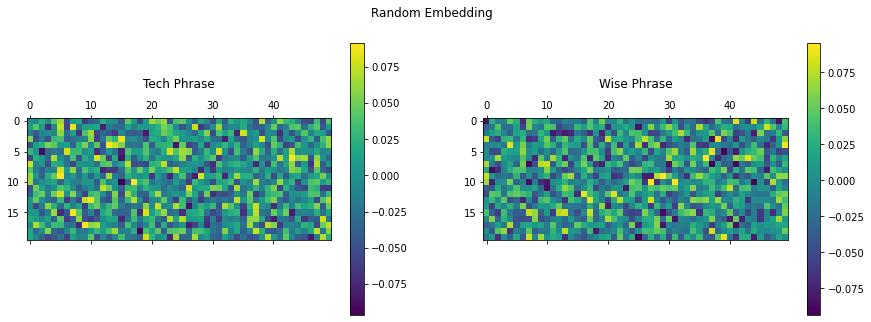

In [14]:
fig = plt.figure(figsize=(15, 5))    
title = ["Tech Phrase", "Wise Phrase"]
for i in range(2):
    ax = plt.subplot(1, 2, 1+i)
    matrix = tf.reshape(random_embedding[i, :, :], (sequence_length, final_output_len))
    cax = ax.matshow(matrix)
    plt.gcf().colorbar(cax)   
    plt.title(title[i], y=1.2)
fig.suptitle("Random Embedding")
plt.show()

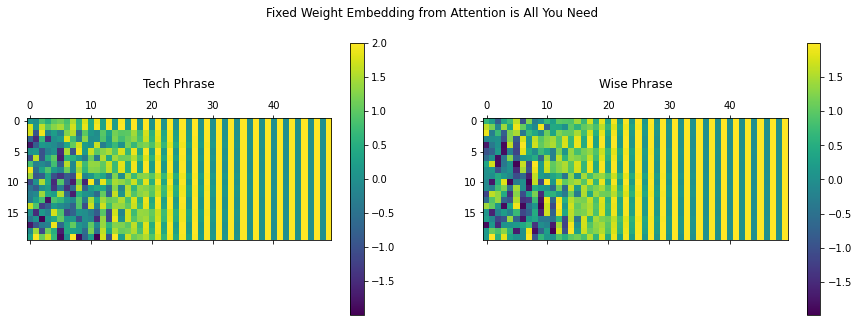

In [15]:
fig = plt.figure(figsize=(15, 5))    
title = ["Tech Phrase", "Wise Phrase"]
for i in range(2):
    ax = plt.subplot(1, 2, 1+i)
    matrix = tf.reshape(fixed_embedding[i, :, :], (sequence_length, final_output_len))
    cax = ax.matshow(matrix)
    plt.gcf().colorbar(cax)   
    plt.title(title[i], y=1.2)
fig.suptitle("Fixed Weight Embedding from Attention is All You Need")
plt.show()

# References
* [blog1](https://machinelearningmastery.com/a-gentle-introduction-to-positional-encoding-in-transformer-models-part-1/)
* [blog2](https://machinelearningmastery.com/the-transformer-positional-encoding-layer-in-keras-part-2/)